# House price prediction

In this exercise, we are going to apply a regression modelling technique to house price prediction using a subset of the [California house price dataset](https://www.kaggle.com/camnugent/california-housing-prices). Our dataset contains 200 observations for housing blocks in California obtained from the 1990 census. The dataset contains columns:

1. `longitude`: A measure of how far west a house is; a higher value is farther west

2. `latitude`: A measure of how far north a house is; a higher value is farther north

3. `housing_median_age`: Median age of a house within a block; a lower number is a newer building

4. `total_rooms`: Total number of rooms within a block

5. `total_bedrooms`: Total number of bedrooms within a block

6. `population`: Total number of people residing within a block

7. `households`: Total number of households, a group of people residing within a home unit, for a block

8. `median_income`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. `median_house_value`: Median house value for households within a block (measured in US Dollars)

10. `ocean_proximity`: Location of the house w.r.t ocean/sea

In this example, we are going to create a regression model to predict `median_house_value` using only `median_income`.

Load the first 200 rows of the file `sample_data/california_housing_train.csv`.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    filepath = "https://raw.githubusercontent.com/lm2612/Tutorials/refs/heads/main/housing_short.csv"
    print(f"Notebook running in google colab. Using raw github filepath = {filepath}")

else:
    filepath = "./housing_short.csv"
    print(f"Notebook running locally. Using local filepath = {filepath}")


Notebook running locally. Using local filepath = ./housing_short.csv


In [3]:
df = pd.read_csv(filepath)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


Our goal is to predict `median_house_value`. This will be our dependent variable, $y$. Pick another variable that you think will be a useful predictor of house value, that we will use as our dependent variable, $x$. First, we should check if these variables appear correlated by plotting them.

We will pick `median_income` in this example. 

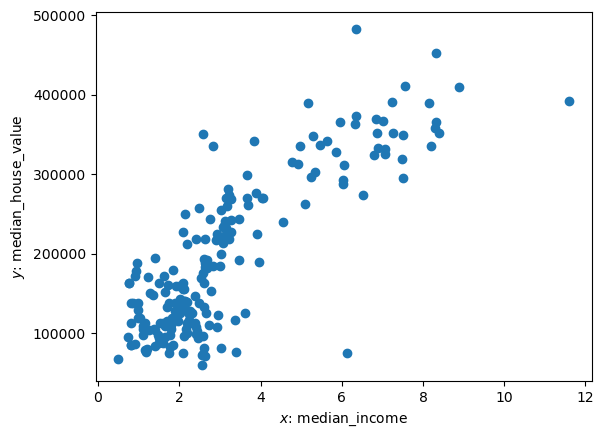

In [4]:
plt.scatter(df["median_income"], df["median_house_value"])
plt.xlabel("$x$: median_income")
plt.ylabel("$y$: median_house_value")
plt.show()

Does your choice of variable seem suitable for linear regression? 

## Linear regression
Split the dataset into a suitable training, validation and test set. 

We will use a split of 70% training, 30% validation and 20% test data. Select our training set comprising the first 140 rows of the dataset, a validation set comprising rows 141-180 and a testing set comprising rows 180-200. (Remember python indices start from 0).

In [5]:
training = df.iloc[:140, :]
validation = df.iloc[140:180, :]
testing = df.iloc[180:, :]

Create a linear regression model to predict median house value from median income using the training set.

### Scikit-learn solution
You can use `sklearn.linear_model.LinearRegression()`. See https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html.

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
# assuming that training set is a pandas dataframe
X = training["median_income"]
y = training["median_house_value"]

X = X.iloc[:, ].values.reshape(-1, 1)      # This reshapes the array so the inputs are the correct size (N, 1)
y = y.iloc[:, ].values.reshape(-1, 1)
reg.fit(X, y)

# print coefficients of model
print(reg.coef_)
print(reg.intercept_)

[[38948.54628248]]
[76003.84375679]


What does your model predict is the average increase in median house value associated with a \$10,000 increase in median income?

In [7]:
reg.predict(np.array([2E4]).reshape(-1, 1)) - reg.predict(np.array([1E4]).reshape(-1, 1))

array([[3.89485463e+08]])

For every $\$10,000$ increase, there is an associated increase in house value of $\$38,948$.

Overlay the linear regression model on top of the training data. What does this suggest about the appropriateness of the model?

Text(0, 0.5, 'Median house value')

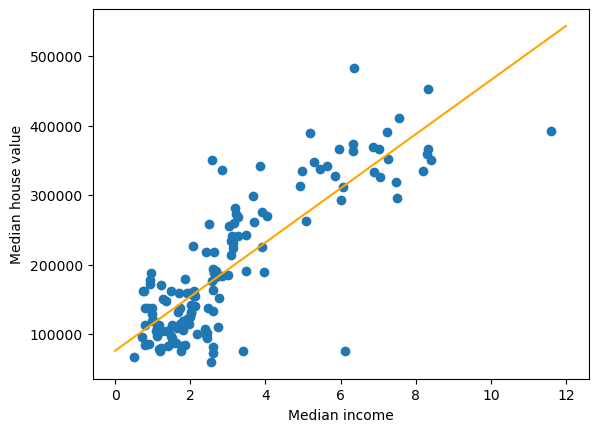

In [8]:
income = np.linspace(0, 12)
income = income.reshape(-1, 1)
price = reg.predict(income)

plt.scatter(training["median_income"], training["median_house_value"])
plt.plot(income, price, "orange")
plt.xlabel("Median income")
plt.ylabel("Median house value")


## Check validation dataset
Predict the 'median_house_value' on the the validation dataset. How would you check the performance?


In [9]:
X_validation = validation["median_income"].values.reshape(-1, 1)
y_validation = validation["median_house_value"].values.reshape(-1, 1)
y_pred_validation = reg.predict(X_validation)

# We will also check performance on the training dataset
y_pred_training = reg.predict(X)


To check performance, we can plot the true validation values against our predictions, ideally these should line up along the 1-to-1 line. We can also use evaluation metrics, such as Root Squared Mean Error (RMSE) and R^2 coefficient.

We can plot the truth vs. the predicted. The goal is a model that predicts along the y=x line (i.e. predicted equals the truth).

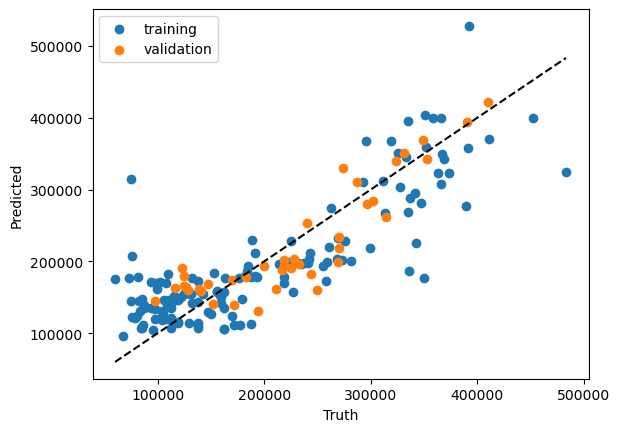

In [10]:
plt.scatter(y, y_pred_training, label="training")
plt.scatter(y_validation, y_pred_validation, label="validation")
plt.plot([min(y), max(y)], [min(y), max(y)], color="black", linestyle="dashed")
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.legend()

The fit is ok but looks like a model incorporating a non-linear association of income on house price would be more appropriate.

## Improving the model

Now fit a linear regression model to the training set of the form:

\begin{equation}
P_i = a + b_1 I_i + b_2 I_i^2
\end{equation}

where $P_i$ is median house price in block $i$ and $I_i$ is median house income of the same block.

In [11]:
reg2 = linear_model.LinearRegression()
training["median_income_2"] = training["median_income"]**2
y = training["median_house_value"]
X = training[["median_income", "median_income_2"]]
y = y.iloc[:, ].values.reshape(-1, 1)
reg2.fit(X, y)

# print coefficients of model
print(reg2.coef_)
print(reg2.intercept_)

[[63195.92025012 -2682.77770672]]
[39378.27235189]


/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2495707192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training["median_income_2"] = training["median_income"]**2


Again plot the model fit for this model versus data. How does the fit compare with the linear model?

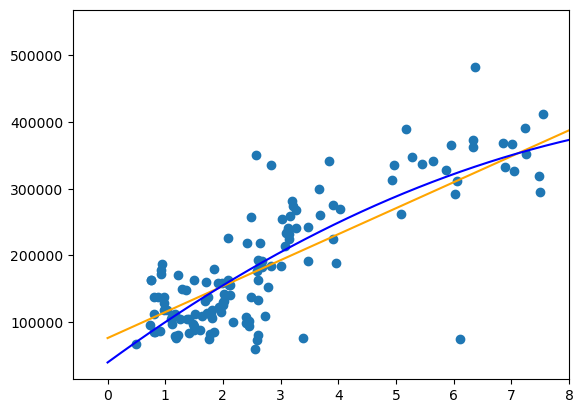

In [12]:
# generate predicted price for quadratic model
income_ranges = pd.DataFrame({'median_income':income[:,0],
                              'median_income_2':income[:,0]**2})
price2 = reg2.predict(income_ranges)

# plot over top of data
plt.scatter(training["median_income"], training["median_house_value"])
plt.plot(income, price, "orange")
plt.plot(income, price2, "blue")
plt.axis(xmax=8)
plt.show()

The fit of the quadratic model appears better to the training data.

Now fit a model using up to 5th order polynomial terms.

In [13]:
# Generate polynomial terms
training["median_income_3"] = training["median_income"]**3
training["median_income_4"] = training["median_income"]**4
training["median_income_5"] = training["median_income"]**5

reg5 = linear_model.LinearRegression()
y = training["median_house_value"]
X = training[["median_income", "median_income_2", "median_income_3", "median_income_4", "median_income_5"]]
y = y.iloc[:, ].values.reshape(-1, 1)
reg5.fit(X, y)

# print coefficients of model
print(reg5.coef_)
print(reg5.intercept_)

[[-2.38761195e+05  1.43183836e+05 -2.93918952e+04  2.60822571e+03
  -8.42148207e+01]]
[235918.900323]


/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2222238780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training["median_income_3"] = training["median_income"]**3
/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2222238780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training["median_income_4"] = training["median_income"]**4
/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2222238780.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

Overlay all three models on top of the training data.

In [14]:
income.shape, price.shape

((50, 1), (50, 1))

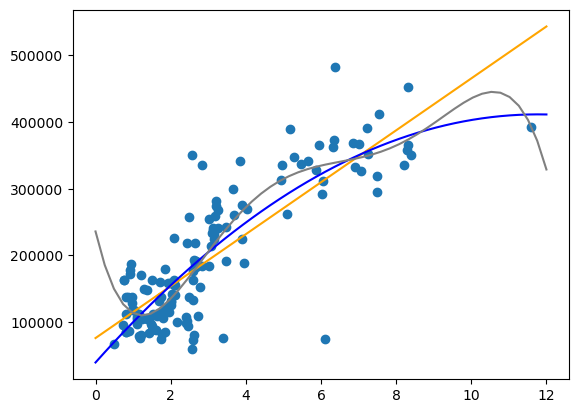

In [15]:
# generate predicted price for quadratic model
income_ranges = pd.DataFrame({'median_income':income[:,0],
                              'median_income_2':income[:,0]**2,
                              'median_income_3':income[:,0]**3,
                              'median_income_4':income[:,0]**4,
                              'median_income_5':income[:,0]**5})
price5 = reg5.predict(income_ranges)

# plot over top of data
plt.scatter(training["median_income"], training["median_house_value"])
plt.plot(income, price, "orange")
plt.plot(income, price2, "blue")
plt.plot(income, price5, "grey")
plt.show()

Now we are going to prepare the fit of all models on the validation set. To do so, first use each of your fitted models to predict house prices in this set.

In [16]:
# create polynomial terms in validation set
validation["median_income_2"] = validation["median_income"]**2
validation["median_income_3"] = validation["median_income"]**3
validation["median_income_4"] = validation["median_income"]**4
validation["median_income_5"] = validation["median_income"]**5

# make predictions on each validation set
price = reg.predict(validation[["median_income"]])
price2 = reg2.predict(validation[["median_income", "median_income_2"]])
price5 = reg5.predict(validation[["median_income", "median_income_2", "median_income_3",
                                  "median_income_4", "median_income_5"]])

/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2693149046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["median_income_2"] = validation["median_income"]**2
/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2693149046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["median_income_3"] = validation["median_income"]**3
/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2693149046.py:4: SettingWithCopyWarning: 
A value is trying to be

Calculate the errors in prediction for each of the three models. Draw histograms of these for each of the models.

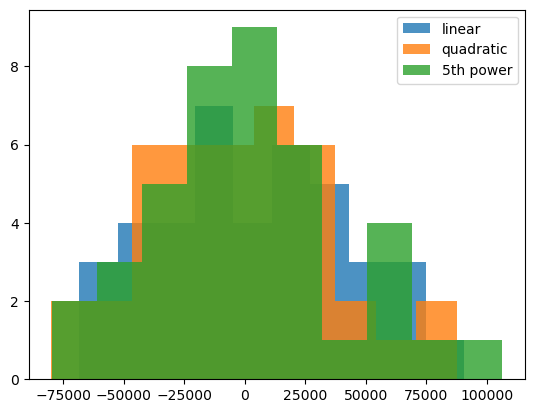

In [17]:
# calculate errors
error = validation["median_house_value"] - price[:, 0]
error2 = validation["median_house_value"] - price2[:, 0]
error5 = validation["median_house_value"] - price5[:, 0]

# plot histograms
plt.hist(error, label="linear", alpha=0.8)
plt.hist(error2, label="quadratic", alpha=0.8)
plt.hist(error5, label="5th power", alpha=0.8)
plt.legend()
plt.show()

Calculate the root mean squared error for each of the models:

\begin{equation}
\text{RMSE} = \sqrt{1/N\sum_{i=1}^N \text{error}_i^2}
\end{equation}

Which model has the best performance and why?

In [18]:
np.sum(error2)

-59107.78593702175

In [19]:
def rmse(errors):
    sse = errors**2
    return np.sqrt(np.mean(sse))

print("linear model RMSE: ", rmse(error))
print("quadratic model RMSE: ", rmse(error2))
print("5th power model RMSE: ", rmse(error5))

linear model RMSE:  38517.81694176683
quadratic model RMSE:  37782.419469828514
5th power model RMSE:  38813.23981829032


The quadratic model! The linear model underfitted the data; the 5th power one overfitted it.

Calculate the RMSE of prediction using the quadratic model on the testing set.

In [20]:
# create polynomial terms in test set
testing["median_income_2"] = testing["median_income"]**2

# make predictions on test set
price2 = reg2.predict(testing[["median_income", "median_income_2"]])

# calculate errors
error2 = testing["median_house_value"] - price2[:, 0]

print("quadratic model RMSE: ", rmse(error2))

quadratic model RMSE:  74903.53093802914


/var/folders/3q/gycsc7sn55z3nwf583zm7k9c0000gq/T/ipykernel_15536/2280085540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["median_income_2"] = testing["median_income"]**2


Why is the performance so much worse on the testing set?

Plot house price versus income for each of the three datasets

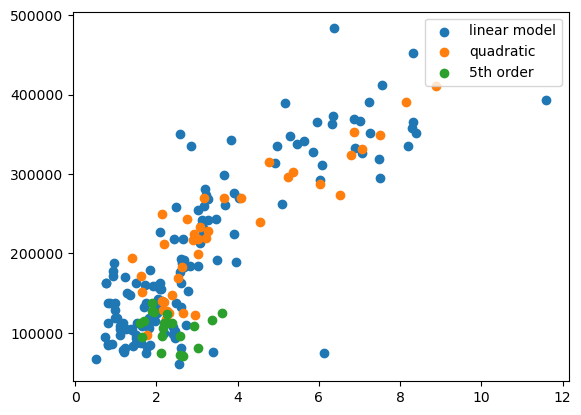

In [21]:
plt.scatter(training["median_income"], training["median_house_value"], label="linear model")
plt.scatter(validation["median_income"], validation["median_house_value"], label="quadratic")
plt.scatter(testing["median_income"], testing["median_house_value"], label="5th order")

plt.legend()
plt.show()

Because the testing set doesn't look much like the training and validation sets! Really important that all three sets look similar if we are to build generalisable models.

## Multivariate regression
What about if you chose a different variable? How would you implement the above for multivariate regression?

We will choose the continous variables only

In [22]:
multivariate_columnnames = [ 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X = training[multivariate_columnnames].values
# No need to edit y. Check the sizes
X.shape, y.shape

((140, 6), (140, 1))

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


When using multiple regression inputs, we need to scale variables first, otherwise those with larger values have large magnitudes (e.g., population) would be given a higher weighting than those with smaller magnitudes (e.g., houseing median age)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X)

# You can also scale y if you would like.
scaler_y = StandardScaler()
scaler_y.fit(y)

StandardScaler()

In [25]:
X_scaled = scaler_X.transform(X)
y_scaled = scaler_y.transform(y)


In [26]:
reg_mv = linear_model.LinearRegression()
reg_mv.fit(X_scaled, y_scaled)



LinearRegression()

What is the most important predictor?


In [27]:
# print coefficients of model
print(reg_mv.coef_)
print(reg_mv.intercept_)

[[ 0.00495246  0.30401002 -0.36986811 -0.53481245  0.79657647  0.74033229]]
[-1.79437246e-16]


We see that the 'households' and 'median_income' coefficients are the largest, indicating they are the best predictor of house price.

How do the errors compare to the univariate prediction?

In [28]:
X_validation_mv = validation[multivariate_columnnames].values
X_validation_mv_scaled = scaler_X.transform(X_validation_mv)

y_pred_mv_validation = scaler_y.inverse_transform(reg_mv.predict(X_validation_mv_scaled))
error_mv = y_validation - y_pred_mv_validation
print(rmse(error_mv), rmse(error))

31119.06279261826 38517.81694176683


We see that the multivariate regression significantly outperforms the univariate regression. We can also visually see this by checking the truth vs. predicted lies closer to the x=y line.

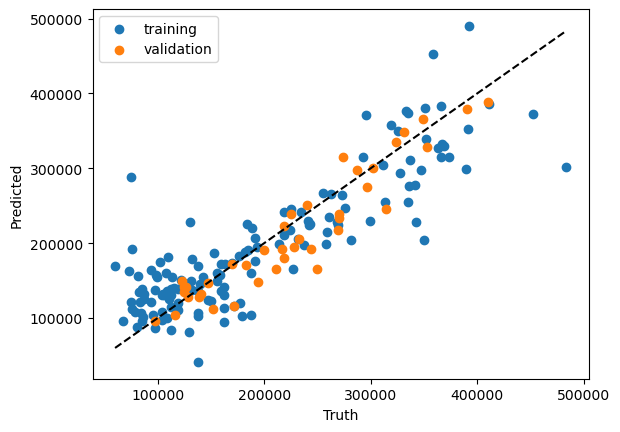

In [29]:
plt.scatter(y,  scaler_y.inverse_transform(reg_mv.predict(X_scaled)), label="training")
plt.scatter(y_validation, y_pred_mv_validation, label="validation")
plt.plot([min(y), max(y)], [min(y), max(y)], color="black", linestyle="dashed")

plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.legend()

## Bonus question
Train a model that uses the L2 regularisation method (Ridge regression). Check the effect this has on the values of the coefficients and on the accuracy on the validation set

In [30]:
reg_ridge = linear_model.Ridge()

reg_ridge.fit(X_scaled, y_scaled)
# print coefficients of model
print(reg_ridge.coef_)
print(reg_ridge.intercept_)

[[ 1.08121375e-03  2.77257874e-01  5.17376966e-04 -4.57306786e-01
   3.73203703e-01  7.51335009e-01]]
[-2.26340997e-16]


All values of coefficients are significantly smaller! Now the median household income is the most important predictor.

In [31]:
y_pred_ridge_validation = scaler_y.inverse_transform(reg_ridge.predict(X_validation_mv_scaled))
error_ridge = y_validation - y_pred_ridge_validation
print(rmse(error_ridge))

31094.331822413747


We see slight improvement in validation error.

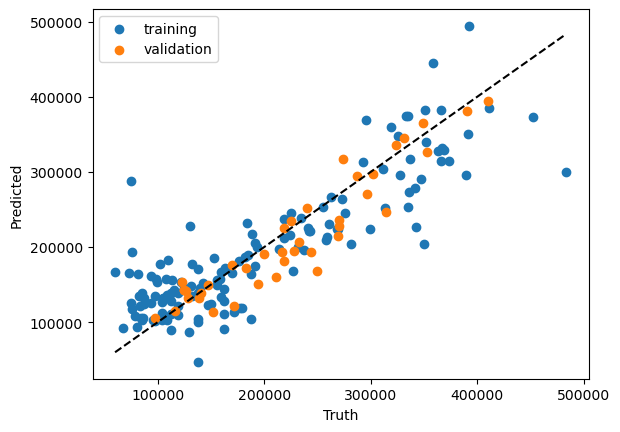

In [32]:
plt.scatter(y,  scaler_y.inverse_transform(reg_ridge.predict(X_scaled)), label="training")
plt.scatter(y_validation, y_pred_ridge_validation, label="validation")
plt.plot([min(y), max(y)], [min(y), max(y)], color="black", linestyle="dashed")

plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.legend()